<a href="https://colab.research.google.com/github/yoo9519-AIdev/Learning/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EA%B1%B0%EB%A6%AC%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 프로그램과 센서를 이용한 차량 간 실시간 거리측정

## 사전 학습된 YOLOv5_custom의 weights(best_blackbox.pt)를 활용해 이미지에서의 차량 검출 확인

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 2486 (delta 6), reused 12 (delta 4), pack-reused 2468
Receiving objects: 100% (2486/2486), 5.35 MiB | 32.59 MiB/s, done.
Resolving deltas: 100% (1628/1628), done.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=7122e756351e2f2f8e06f5548d0150af92652b84b76d6a30dc18b1af67543182
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import Image
Image('고속도로사진1.jpg')

In [ ]:
# 저사양으로 사용할 때

# from PIL import Image

# image = Image.open('/content/drive/My Drive/project/센서를 활용한 거리측정/고속도로사진1.jpg')
# resize_image = image.resize((512,512))
# resize_image.save('고속도로사진변환1.jpg')

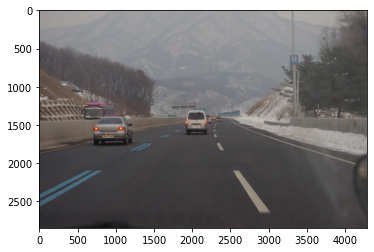

In [ ]:
pic_1 = plt.imread('/content/drive/My Drive/project/센서를 활용한 거리측정/고속도로사진1.jpg')
plt.imshow(pic_1) # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray'

In [ ]:
%%time
!python detect.py --weights /content/best_blackbox_video.pt --img 512 --conf 0.4 --source /content/고속도로사진1.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=512, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/고속도로사진1.jpg', update=False, view_img=False, weights=['/content/best_blackbox_video.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 8.84175e+07 parameters, 8.45317e+07 gradients
image 1/1 /content/고속도로사진1.jpg: 384x512 2 Cars, Done. (1.356s)
Results saved to inference/output
Done. (1.905s)
CPU times: user 30.7 ms, sys: 14.3 ms, total: 45 ms
Wall time: 6.35 s


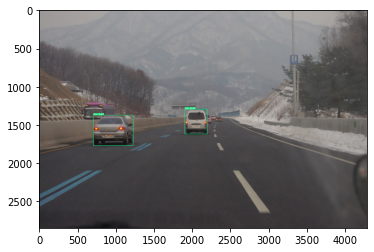

In [ ]:
pic_1_yolo = plt.imread('/content/yolov5/inference/output/고속도로사진1(yolo).jpg')
plt.imshow(pic_1_yolo) # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray')

In [ ]:
pic_1_yolo.shape

(2848, 4288, 3)

## 조건 및 가설  
 - 조건 1 : 카메라의 설치 높이는 1m라고 가정(측정 대상과 평행)  
 - 조건 2 : 차선(1개)의 길이는, 차선 시작으로부터 다음 차선 시작 전까지의 거리로 정의(7m)  
 - 조건 3 : 픽셀 당 거리단위를 계산하기 전에, 눈대중으로 차선에 걸쳐있으면 3.5m로 계산. 점선 7개 = 7 * 8 = 56m 이므로, 버스전용차선아 아닌 전방에 있는 차량 기준으로, 임의적으로 거리를 측정해보면 21~22m정도 이격되있는 것으로 가정.  
 - 조건(가설) 4 : 하지만 차선의 경우 도로한정이기때문에, 이미지 픽셀의 값에 따라 거리를 측정하는 것을 기본으로 ㄱ  
 - 카메라는 우선 Iphone 6+ 를 사용(open/network cam의 경우 나중에)

## 실행단계  
 - 단계 0 : opencv2 사용(C++이라 python보다 빠름)  
 - 단계 1 : 사진 pixel(사이즈)과 거리를 통일 기준이 되는 거리계산 값이 있어야 함
 - 단계 2 : 임계값 설정
 - 단계 3 : 원근법을 적용? 기준 물체가 있어야 한다?
 - 단계 4 : 다양한 도로 위 자동차 사진으로 실험 진행
 - 단계 5 : 저장된 동영상으로 실험(블랙박스 영상)
 - 단계 6 : 실시간으로 측정을 위해, 서버를 만들고 모듈을 적용해야 한다.  

## 최종목적  
- 모든 이미지에 검출된 객체의 거리를 측정할 수 있다(사진 size 및 pixel 값 통일).
- 차량의 인식률을 높인다.
- 실시간으로 영상을 처리하기 위해 서버를 제작하거나, APP을 이용하여 상용화한다.
